In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/prediction.csv", sep = ",")
data['Primary_sales'] = data['Primary_sales'].fillna(0)
data

,Unnamed: 0,Date,Number_of_sales,Active_markets_wallets,Primary_sales,ETH_high_price,Sales_USD
0,0,2017-11-09,1.482700e+02,2.0,0.0,0.0,329.451996
1,1,2017-11-10,0.000000e+00,0.0,0.0,0.0,324.717987
2,2,2017-11-11,0.000000e+00,0.0,0.0,0.0,319.453003
3,3,2017-11-12,9.111000e+01,1.0,0.0,0.0,319.153015
4,4,2017-11-13,6.307000e+01,2.0,2.0,0.0,328.415009
...,...,...,...,...,...,...,...
1461,1461,2021-11-08,7.706698e+07,59264.0,0.0,44435.0,4822.363281
1462,1462,2021-11-09,5.197508e+07,50879.0,0.0,32156.0,4837.589355
1463,1463,2021-11-10,5.901034e+07,44822.0,0.0,27694.0,4859.502930
1464,1464,2021-11-11,3.554317e+07,13935.0,0.0,7808.0,4778.059082


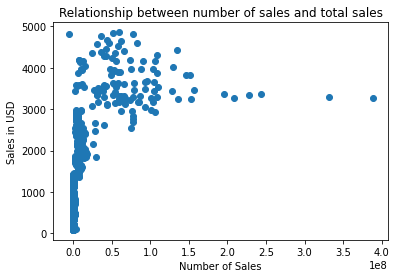

In [5]:
plt.scatter(data.Number_of_sales, data.Sales_USD)
plt.xlabel("Number of Sales")
plt.ylabel("Sales in USD")
plt.title("Relationship between number of sales and total sales")
plt.show()

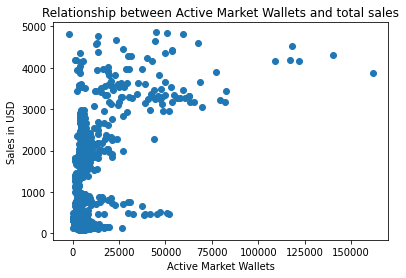

In [10]:
plt.scatter(data.Active_markets_wallets, data.Sales_USD)
plt.xlabel("Active Market Wallets")
plt.ylabel("Sales in USD")
plt.title("Relationship between Active Market Wallets and total sales")
plt.show()

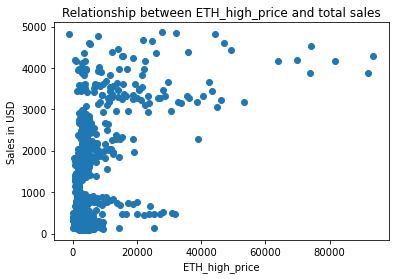

In [ ]:
plt.scatter(data.ETH_high_price, data.Sales_USD)
plt.xlabel("ETH_high_price")
plt.ylabel("Sales in USD")
plt.title("Relationship between ETH_high_price and total sales")
plt.show()

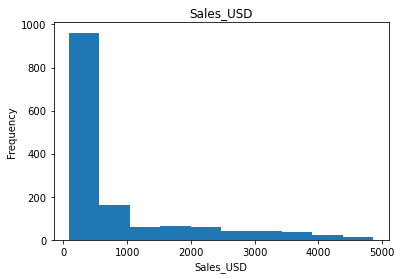

In [ ]:
plt.hist(data.Sales_USD,bins=10)
plt.title("Sales_USD")
plt.xlabel("Sales_USD")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [19]:
# using the columns without Sales_USD to train the data
data.fillna(0)
X = data.drop(['Date', 'Sales_USD', 'Unnamed: 0'], axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, data.Sales_USD)
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 514.1147184738213


In [20]:
pd.DataFrame({'featues':X.columns, 'estimatedCoefficients':lm.coef_})

,featues,estimatedCoefficients
0,Number_of_sales,0.000016
1,Active_markets_wallets,-0.008784
2,Primary_sales,0.237538
3,ETH_high_price,0.034243


Text(0, 0.5, 'Frequency')

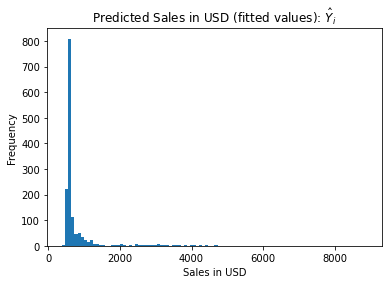

In [21]:
plt.hist(lm.predict(X),bins=100)
plt.title('Predicted Sales in USD (fitted values): $\hat{Y}_i$')
plt.xlabel('Sales in USD')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Sales vs Predicted Sales: $Y_i$ vs $\\hat{Y}_i$')

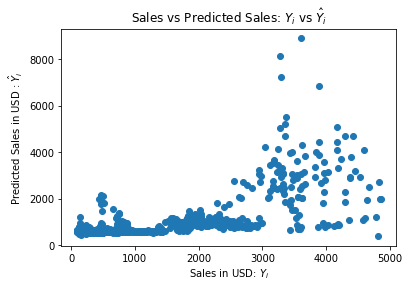

In [22]:
plt.scatter(data.Sales_USD, lm.predict(X))
plt.xlabel("Sales in USD: $Y_i$")
plt.ylabel("Predicted Sales in USD : $\hat{Y}_i$")
plt.title("Sales vs Predicted Sales: $Y_i$ vs $\hat{Y}_i$")

In [23]:
sse = np.sum((data.Sales_USD - lm.predict(X)) ** 2)
sse

844179770.3749282

In [25]:
mse = np.mean((data.Sales_USD - lm.predict(X)) ** 2)
mse

575838.8611015881

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, data.Sales_USD, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(982, 4)
(484, 4)
(982,)
(484,)


In [27]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [28]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 527731.730402436
Fit a model X_train, and calculate MSE with X_test, Y_test: 930845.2619910439


In [30]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, lm.predict(X_test)), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, lm.predict(X_test)), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, lm.predict(X_test)), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, lm.predict(X_test)), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, lm.predict(X_test)), 2))

Mean absolute error = 561.59
Mean squared error = 930845.26
Median absolute error = 377.15
Explain variance score = 0.32
R2 score = 0.32


Text(0.5, 1.0, 'Sales vs Predicted Sales: $Y_i$ vs $\\hat{Y}_i$')

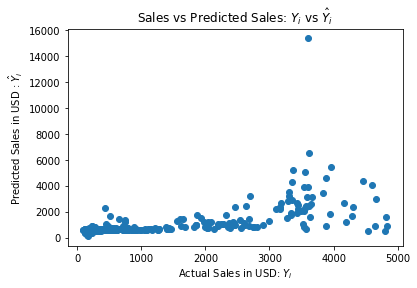

In [32]:
plt.scatter(Y_test, lm.predict(X_test))
plt.xlabel("Actual Sales in USD: $Y_i$")
plt.ylabel("Predicted Sales in USD : $\hat{Y}_i$")
plt.title("Sales vs Predicted Sales: $Y_i$ vs $\hat{Y}_i$")